In [1]:
# Dependencies and libraries
import numpy as np
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import os
import datetime
import time

from config import api_key
from tickers import energy_industry

In [2]:
# Looking at stock performance by industry relevant indexes

# Variable initialization
close_daily_price =[]
ticker_date = []
delta = datetime.timedelta(days=1)

# Search parameters
industry_index = energy_industry
start_date = datetime.datetime(2020,1,1)
end_date = datetime.datetime(2021,1,1)
base_url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY'

# For loop to create the date column and create the results dataframe
while start_date <= end_date:
    
    ticker_date.append(start_date)
    
    # Building the results dataframe
    ticker_value_df = pd.DataFrame({'Date': ticker_date})
    
    start_date += delta
                                    
# Resetting start date
start_date = datetime.datetime(2019,8,1)
                                    
# For loop to make the call for every industry index and retrieving the data
for ticker in industry_index:
    
    # Building the search url
    url = f'{base_url}&symbol={ticker}&outputsize=full&apikey={api_key}'
    
    # Making the API call
    response = requests.get(url)
    response_json = response.json()
    
    #Progress tracker
    print (f'Processing {ticker} with code {response.status_code}')
    
    # Retrieving daily closing prices
    while start_date <= end_date:
    
        # Obtaining date as string
        string_date = start_date.strftime("%Y-%m-%d")

        # Exception for dates with no operation
        try:
            close_daily_price.append(float(response_json['Time Series (Daily)'][string_date]["4. close"]))
        except (KeyError):
            close_daily_price.append(0)  
        
        start_date += delta
                                    
    # Adding the current ticker to the dataframe
    ticker_value_df[ticker] = pd.Series(close_daily_price)
    close_daily_price.clear()
    start_date = datetime.datetime(2019,8,1)
    time.sleep(12)
    
print("API calls done")

Processing XOP with code 200
Processing XES with code 200
API calls done


In [3]:
ticker_value_df

,Date,XOP,XES
0,2020-01-01,23.47,8.58
1,2020-01-02,23.20,8.26
2,2020-01-03,0.00,0.00
3,2020-01-04,0.00,0.00
4,2020-01-05,22.24,7.96
...,...,...,...
362,2020-12-28,51.07,34.85
363,2020-12-29,52.76,35.72
364,2020-12-30,51.41,34.83
365,2020-12-31,51.37,34.08


In [5]:
# Cleaning the results dataframe

# Dropping rows with no values (no stocks operations)
clean_df = ticker_value_df.loc[ticker_value_df["XOP"]!=0].reset_index(drop=True)
clean_df

# Dropping columns with no data (Indexes not found in the API)

# Creating the list with tickers to keep
keep_columns = []

for column in clean_df:
    column_index = clean_df.columns.get_loc(column)   
    if clean_df.iloc[0, column_index] != 0:
        keep_columns.append(column)
        
clean_df = clean_df[keep_columns]

clean_df

,Date,XOP,XES
0,2020-01-01,23.47,8.58
1,2020-01-02,23.20,8.26
2,2020-01-05,22.24,7.96
3,2020-01-06,21.91,7.84
4,2020-01-07,21.86,7.74
...,...,...,...
248,2020-12-27,51.82,36.03
249,2020-12-28,51.07,34.85
250,2020-12-29,52.76,35.72
251,2020-12-30,51.41,34.83


In [6]:
clean_df.describe()

,XOP,XES
count,253.000000,253.000000
mean,30.491146,15.067312
std,15.329131,11.995947
min,7.540000,2.000000
25%,20.900000,6.860000
50%,22.690000,7.680000
75%,48.030000,26.770000
max,71.820000,47.570000


In [7]:
clean_df.dtypes

Date    datetime64[ns]
XOP            float64
XES            float64
dtype: object

In [8]:
ticker_list=[]
inititial_price=[]
final_price=[]
#For loop to retrive data
for column in clean_df:
    if column !="Date":
        ticker_list.append(column)
        
        ticker_initial=clean_df.loc[clean_df["Date"]=='2020-01-01',column].tolist()
        inititial_price.append(ticker_initial[0])
        
        ticker_final=clean_df.loc[clean_df["Date"]=='2020-12-31',column].tolist()
        final_price.append(ticker_final[0])
        
                       
#Builiding the price change % dataframe
ava_df=pd.DataFrame({"Ticker":ticker_list,
                    "Initial":inititial_price,
                    "Final":final_price,})

#Comput price change%
ava_df['Percentage Price Change']= (ava_df['Final']-ava_df['Initial'])/(ava_df['Initial'])
ava_df['Percentage Price Change']=(ava_df['Percentage Price Change']*100).map("{:.2f}%".format)
ava_df

,Ticker,Initial,Final,Percentage Price Change
0,XOP,23.47,51.37,118.88%
1,XES,8.58,34.08,297.20%


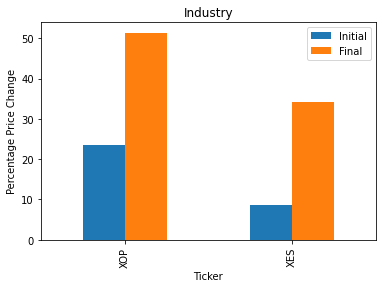

In [9]:
ava_df.plot(kind="bar")
plt.xticks(ava_df.index.tolist(),ava_df["Ticker"].tolist())
plt.title("Industry")
plt.xlabel("Ticker")
plt.ylabel("Percentage Price Change")
plt.show()

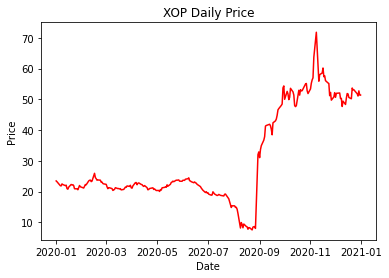

In [18]:
# Generate a scatter plot XPH 
x_axis = clean_df["Date"]
tumsiz = clean_df["XOP"]

fig1, ax1 = plt.subplots()
plt.title('XOP Daily Price')
#plt.axvline(x=44197)
plt.plot(x_axis, tumsiz,linewidth=1.5, markersize=0,marker="o",color="red")
plt.xlabel('Date')
plt.ylabel('Price')

# Saving to png
filename = 'XOP_daily.png'
path = os.path.join('energy_analysis', 'plot_images', filename)
plt.savefig(path, transparent=False)

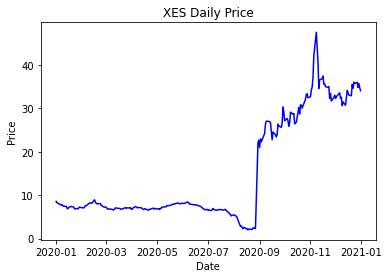

In [17]:
x_axis = clean_df["Date"]
tumsiz = clean_df["XES"]

fig1, ax1 = plt.subplots()
plt.title('XES Daily Price')
plt.plot(x_axis, tumsiz,linewidth=1.5, markersize=0,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Date')
plt.ylabel('Price')

# Saving to png
filename = 'XES_daily.png'
path = os.path.join('energy_analysis', 'plot_images', filename)
plt.savefig(path, transparent=False)